In [1]:
import pandas as pd
import requests

# Bitcoincharts

From http://api.bitcoincharts.com/v1/csv/

In [11]:
df = pd.read_csv(".coinbaseUSD.csv", header=None)

In [13]:
df.columns = ["datetime", "price", "quantity"]
df["datetime"] = df["datetime"].apply(lambda x: dt.datetime.fromtimestamp(x))
df.set_index("datetime", inplace=True)

In [16]:
df.head(10)

,datetime,price,quantity
0,2014-12-01 05:33:56,300.00,0.010000
1,2014-12-01 05:40:23,300.00,0.010000
2,2014-12-01 06:24:08,370.00,0.010000
3,2014-12-01 06:50:12,370.00,0.026556
4,2014-12-02 05:29:26,377.00,0.010000
5,2014-12-02 10:59:09,377.75,0.250000
6,2014-12-02 10:59:09,378.00,3.750000
7,2014-12-02 11:04:17,378.00,4.900000
8,2014-12-02 11:05:40,378.00,5.200000
9,2014-12-02 18:43:00,378.00,0.100000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56615868 entries, 2014-12-01 05:33:56 to 2019-01-07 22:06:59
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   price     float64
 1   quantity  float64
dtypes: float64(2)
memory usage: 1.3 GB


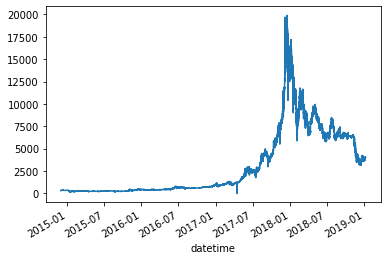

In [18]:
df["price"].plot()

# Coinapi

In [67]:
url = 'https://rest.coinapi.io/v1/ohlcv/BTC/USD/history?period_id=1MIN&time_start=2017-01-01T00:00:00'
headers = {'X-CoinAPI-Key' : 'D973D75A-C45D-4967-B0EB-12130342636B'}
response = requests.get(url, headers=headers)

In [68]:
response

<Response [200]>

In [70]:
df = pd.DataFrame(response.json())

In [69]:
df.head()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2016-01-01T00:00:00.0000000Z,2016-01-01T00:01:00.0000000Z,2016-01-01T00:00:16.0000000Z,2016-01-01T00:00:16.0000000Z,430.35,430.39,430.35,430.39,0.072700,4
1,2016-01-01T00:01:00.0000000Z,2016-01-01T00:02:00.0000000Z,2016-01-01T00:01:01.1500000Z,2016-01-01T00:01:46.0000000Z,430.89,430.89,430.38,430.40,1.028431,7
2,2016-01-01T00:02:00.0000000Z,2016-01-01T00:03:00.0000000Z,2016-01-01T00:02:13.8870000Z,2016-01-01T00:02:46.4830000Z,430.89,430.89,430.40,430.89,1.776657,4
3,2016-01-01T00:03:00.0000000Z,2016-01-01T00:04:00.0000000Z,2016-01-01T00:03:16.0000000Z,2016-01-01T00:03:16.0000000Z,430.37,430.39,430.36,430.36,12.566300,5
4,2016-01-01T00:04:00.0000000Z,2016-01-01T00:05:00.0000000Z,2016-01-01T00:04:32.5200000Z,2016-01-01T00:04:52.3830000Z,430.19,431.06,430.19,431.06,2.985161,6


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time_period_start  100 non-null    object 
 1   time_period_end    100 non-null    object 
 2   time_open          100 non-null    object 
 3   time_close         100 non-null    object 
 4   price_open         100 non-null    float64
 5   price_high         100 non-null    float64
 6   price_low          100 non-null    float64
 7   price_close        100 non-null    float64
 8   volume_traded      100 non-null    float64
 9   trades_count       100 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 7.9+ KB


# Cryptocompare

In [86]:
url = 'https://min-api.cryptocompare.com/data/v2/histominute?fsym=BTC&tsym=USD&limit=2000&e=Coinbase'
headers = {}
response = requests.get(url, headers=headers)

In [87]:
response

<Response [200]>

In [88]:
df = pd.DataFrame(response.json()["Data"]["Data"])
df["datetime"] = df["time"].apply(lambda x: dt.datetime.fromtimestamp(x))
df

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,datetime
0,1618382760,64626.92,64665.90,64615.68,64652.10,11.400,737190.20,force_direct,,2021-04-14 07:46:00
1,1618382820,64564.27,64626.92,64552.66,64626.92,5.531,357128.56,force_direct,,2021-04-14 07:47:00
2,1618382880,64611.00,64617.48,64564.27,64564.27,2.049,132326.03,force_direct,,2021-04-14 07:48:00
3,1618382940,64641.98,64650.00,64601.75,64611.00,5.177,334579.03,force_direct,,2021-04-14 07:49:00
4,1618383000,64615.44,64641.99,64601.75,64641.98,9.677,625297.07,force_direct,,2021-04-14 07:50:00
...,...,...,...,...,...,...,...,...,...,...
1996,1618502520,62773.20,62818.54,62739.26,62805.01,9.255,581066.32,force_direct,,2021-04-15 17:02:00
1997,1618502580,62709.98,62773.20,62705.08,62773.20,5.637,353647.28,force_direct,,2021-04-15 17:03:00
1998,1618502640,62706.92,62711.92,62650.04,62709.98,13.560,849899.05,force_direct,,2021-04-15 17:04:00
1999,1618502700,62642.20,62719.61,62642.20,62706.92,8.638,541410.65,force_direct,,2021-04-15 17:05:00


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              2001 non-null   int64  
 1   high              2001 non-null   float64
 2   low               2001 non-null   float64
 3   open              2001 non-null   float64
 4   volumefrom        2001 non-null   float64
 5   volumeto          2001 non-null   float64
 6   close             2001 non-null   float64
 7   conversionType    2001 non-null   object 
 8   conversionSymbol  2001 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB
